<a href="https://colab.research.google.com/github/JuliaVazTostes/curso_data_science/blob/master/M%C3%B3dulo_4_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística

No exemplo da Regressão Linear, queríamos inferir qual o preço de venda colocar em uma casa, dado um conjunto de *features*. Ou seja, queríamos fazer a previsão de um valor contínuo.

Já a Regressão Logística serve para classificar algo dentro de um conjunto de categorias. Como exemplo, podemos pegar o *dataset* de pacientes com doenças cardiovasculares usado no módulo anterior.

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-04.12.06.png" width="40%"></p>

Na última linha, como faríamos para classificar o paciente como possuindo ou não uma doença cardíaca? A Regressão Linear não é adequada aqui, uma vez que trabalha com valores contínuos.

A Regressão Logística é ideal nesse tipo de situação, de classificação, pois trabalha com probabilidades. No caso, após treinar o modelo conseguiríamos ver qual a probabilidade de um dado paciente possuir ou não algum problema no coração.

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Screen-Shot-2019-10-07-at-04.53.01.png" width="50%"></p>

Pense na imagem acima como se o eixo-x fosse a idade de um paciente e o eixo y a probabilidade dele ter uma doença cardíaca. O problema da Regressão Linear é que ela é.. linear! O ideal é uma curva que estime melhor essa relação - e esta é a curva sigmoidal (repararam no nome??). 

## Regressão Logística no `scikit-learn`

O conjunto de dados original, que foi adapatado neste *notebook*, foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

Diferentemente do arquivo `csv` que foi disponibilizado no Módulo 3, [neste link](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0) você encontra o arquivo com os dados já tratado. Para nossa variável alvo (*target*) você encontra as seguintes categorias:

* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1: há doença cardíaca ( > 50% de estreitamento do diâmetro)



In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Repare em tudo que estamos importando na célula abaixo. Além de `LogisticRegression` estamos importando métricas totalmente diferentes daquelas que usamos para avaliar modelos de Regressão Linear, o que faz todo sentido.


In [0]:
# importar scikit-learn para criar o modelo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Nesta etapa, vamos dividir o *dataset* entre treino e teste, da mesma maneira que fizemos e sempre vamos fazer para outros modelos.

In [3]:
# determinar X e y
X = df.drop('num', axis=1)
y = df['num']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# criar e treinar um modelo de Regressão Linear
ml_model = LogisticRegression(C=0.01)
ml_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Vamos testar o desempenho do modelo em cima do nosso conjunto de testes. Para isso, vou colocar a variável `X_test` como argumento do `ml_model.predict()` e guardar as previsões para verificar o desempenho do modelo.

Uma outra diferença da Regresssão Logística para a Linear é que eu consigo não apenas extrair as previsões, mas também as probabilidades para cada classe.

In [4]:
# previsões e probabilidades em cima do dataset de teste
y_pred = ml_model.predict(X_test)
y_prob = ml_model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_prob: \n", y_prob[0:5])

y_pred: 
 [0 1 0 1 1]

y_prob: 
 [[0.66620633 0.33379367]
 [0.30567714 0.69432286]
 [0.8855447  0.1144553 ]
 [0.16644693 0.83355307]
 [0.30491935 0.69508065]]


Uma das principais maneiras de você verificar o desempenho do seu algoritmo é por meio da Matriz de Confusão. Para cada classe, ela informa quais os valores reais (*actual*) e os valores previstos pelo modelo (*predicted*).

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/6a010534b1db25970b01bb08c97955970d.png" width="200px"></p>

Dessa maneira, é possível rapidamente identificar:

* **Verdadeiro positivo (*true positive* — TP):** Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como tendo doença vascular.

* **Falso positivo (*false positive* — FP):** Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como tendo doença vascular.

* **Falso verdadeiro (*true negative* — TN)**: Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

* **Verdadeiro negativo (*false negative* — FN):** Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        45
           1       0.85      0.71      0.77        31

    accuracy                           0.83        76
   macro avg       0.83      0.81      0.82        76
weighted avg       0.83      0.83      0.83        76



Observe como o desempenho do modelo foi muito melhor que o anterior em todas as métricas adotadas. Esse *dataset* que foi usado aqui ainda não é o completo. Há espaço para mais melhorias, tanto com a inclusão dessas novas *features* quando com a criação de novas.

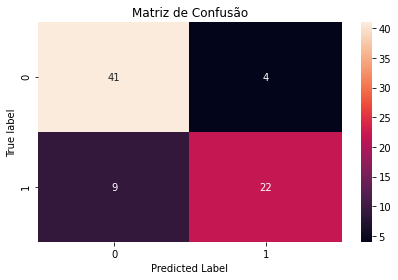

In [6]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()